In [47]:
import pandas as pd
import numpy as np

In [48]:
risk_data = pd.read_pickle("df_for_model.pkl")

In [49]:
import pandas as pd
import numpy as np

n = int(input("변동성을 확인할 기준 기간(n일)을 입력하세요: "))

# 1. 원본에서 분석용 DF 생성
df_analysis = risk_data[['날짜', 'industry', 'Risk_Index']].copy()

# 2. 분석용 DF에만 계산 컬럼 추가
# groupby와 transform을 쓰되, 결과만 df_analysis에 저장
group = df_analysis.groupby('industry')['Risk_Index']

df_analysis['MA'] = group.transform(lambda x: x.rolling(window=n).mean())
df_analysis['STD'] = group.transform(lambda x: x.rolling(window=n).std())

# 3. 상/하한선 및 이상치 계산
df_analysis['Upper'] = df_analysis['MA'] + (2 * df_analysis['STD'])
df_analysis['Lower'] = df_analysis['MA'] - (2 * df_analysis['STD'])

# 4. 이상치 판별
df_analysis['Is_Outlier'] = (df_analysis['Risk_Index'] > df_analysis['Upper']) | \
                            (df_analysis['Risk_Index'] < df_analysis['Lower'])

# 5. 이상치만 모은 별도 데이터프레임
outliers = df_analysis[df_analysis['Is_Outlier'] == True].copy()

변동성을 확인할 기준 기간(n일)을 입력하세요: 30


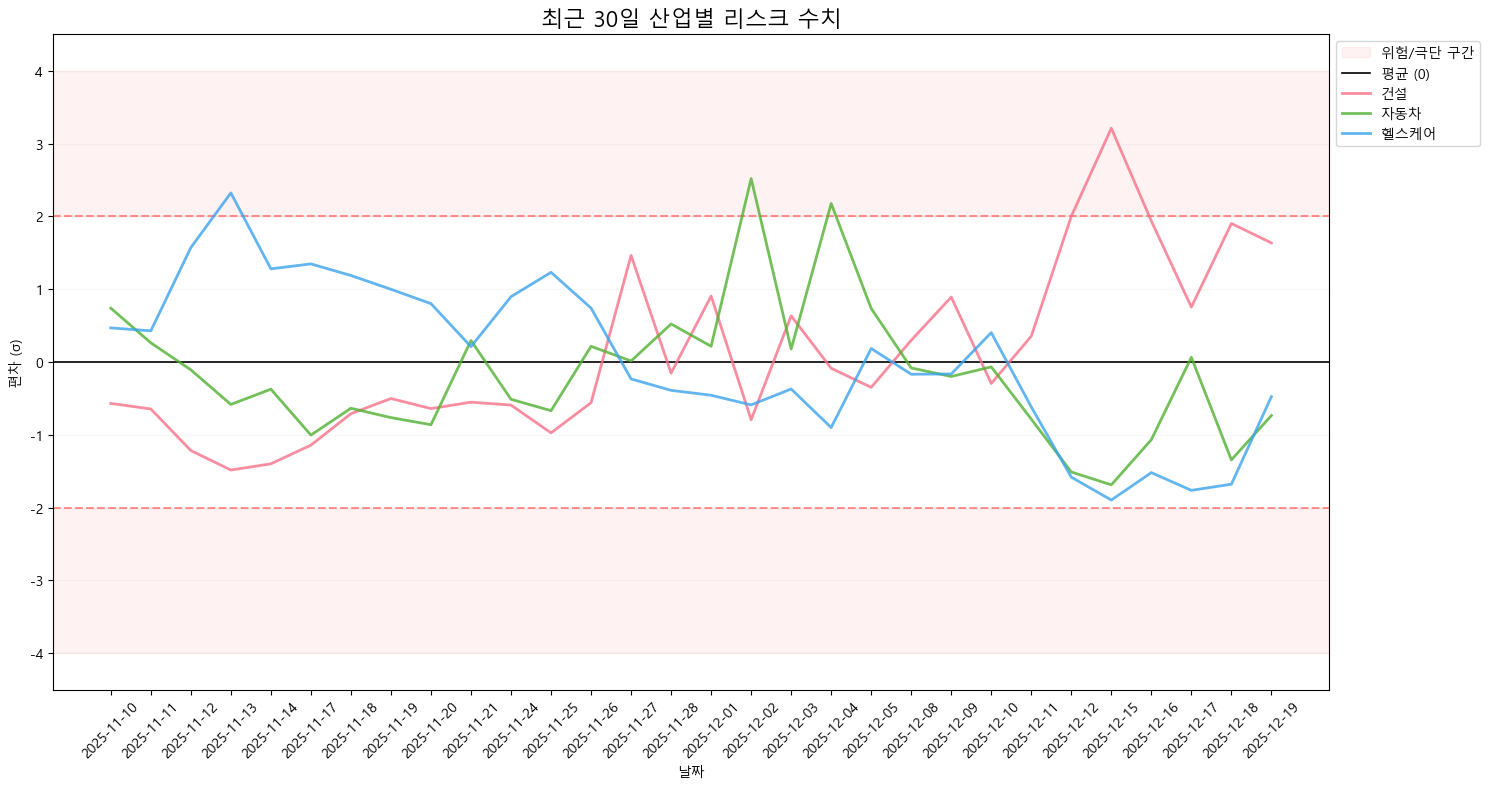

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Z-Score 계산
df_analysis['Z_Score'] = df_analysis.groupby('industry')['Risk_Index'].transform(lambda x: (x - x.mean()) / x.std())

# 1. 폰트 및 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15, 8))

# 2. 배경 구간 색칠
plt.axhspan(2, 4, color='red', alpha=0.05, label='위험/극단 구간')
plt.axhspan(-4, -2, color='red', alpha=0.05)

# 3. 가이드 수평선
plt.axhline(0, color='black', linewidth=1.2, label='평균 (0)')
plt.axhline(2, color='red', linestyle='--', alpha=0.4)
plt.axhline(-2, color='red', linestyle='--', alpha=0.4)

# 4. 산업별 Z-Score 선 그리기 (최신 n일치만!)
industries = df_analysis['industry'].unique()
colors = sns.color_palette("husl", len(industries))

for i, industry in enumerate(industries):
    # 해당 산업 데이터 필터링 후, 최신 n일치만 tail(n)으로 추출
    df_ind = df_analysis[df_analysis['industry'] == industry].tail(n)
    
    plt.plot(df_ind['날짜'], df_ind['Z_Score'], label=industry, color=colors[i], lw=2, alpha=0.8)

# 5. 그래프 꾸미기
plt.title(f'최근 {n}일 산업별 리스크 수치', fontsize=16)
plt.ylabel('편차 (σ)')
plt.xlabel('날짜')
plt.ylim(-4.5, 4.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, axis='y', alpha=0.1)

# x축 날짜 라벨이 겹치지 않게 회전 (데이터가 많을 경우 대비)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [51]:
risk_data

,날짜,Ave_sentiment,본문,industry,Unnamed: 0,종가(백만원),거래량(천주),전일대비,Total_News,Total_Volume,Risk_Index,D+1 종가,D+2 종가,D+1 상승률,D+2 상승률,article_ratio,trade_volum_ratio
0,2025-10-01,0.696901,84,건설,3,773.53,6922801,5.47,437,30751473,0.024878,774.52,788.26,0.127985,1.904257,0.192220,0.225121
1,2025-10-02,0.669425,40,건설,6,774.52,7349337,0.99,280,35183514,0.016957,788.26,786.46,1.774002,1.541600,0.142857,0.208886
2,2025-10-10,0.580599,30,건설,9,788.26,11288559,13.74,179,47060285,0.019343,786.46,788.96,-0.228351,0.088803,0.167598,0.239874
3,2025-10-13,0.573305,50,건설,12,786.46,8443590,-1.80,323,34617515,0.018009,788.96,822.37,0.317880,4.566030,0.154799,0.243911
4,2025-10-14,0.525187,71,건설,15,788.96,36232856,2.50,328,67871370,0.044022,822.37,813.93,4.234689,3.164926,0.216463,0.533846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2025-12-15,0.803046,206,헬스케어,149,4927.73,30104286,62.48,477,144788403,0.054455,4881.50,4796.50,-0.938160,-2.663092,0.431866,0.207919
155,2025-12-16,0.798630,274,헬스케어,152,4881.50,38287102,-46.23,671,139052143,0.066511,4796.50,4775.98,-1.741268,-2.161631,0.408346,0.275343
156,2025-12-17,0.783878,241,헬스케어,155,4796.50,25323016,-85.00,605,101148584,0.058723,4775.98,4861.55,-0.427812,1.356197,0.398347,0.250355
157,2025-12-18,0.856880,292,헬스케어,158,4775.98,21146956,-20.52,707,91788855,0.061420,4861.55,NaN,1.791674,NaN,0.413013,0.230387


In [52]:
result = risk_data[['날짜','industry','Ave_sentiment','Risk_Index','Total_News',
                    'article_ratio','Total_Volume','trade_volum_ratio']]
result

,날짜,industry,Ave_sentiment,Risk_Index,Total_News,article_ratio,Total_Volume,trade_volum_ratio
0,2025-10-01,건설,0.696901,0.024878,437,0.192220,30751473,0.225121
1,2025-10-02,건설,0.669425,0.016957,280,0.142857,35183514,0.208886
2,2025-10-10,건설,0.580599,0.019343,179,0.167598,47060285,0.239874
3,2025-10-13,건설,0.573305,0.018009,323,0.154799,34617515,0.243911
4,2025-10-14,건설,0.525187,0.044022,328,0.216463,67871370,0.533846
...,...,...,...,...,...,...,...,...
154,2025-12-15,헬스케어,0.803046,0.054455,477,0.431866,144788403,0.207919
155,2025-12-16,헬스케어,0.798630,0.066511,671,0.408346,139052143,0.275343
156,2025-12-17,헬스케어,0.783878,0.058723,605,0.398347,101148584,0.250355
157,2025-12-18,헬스케어,0.856880,0.061420,707,0.413013,91788855,0.230387


In [53]:
result = result.copy()

result['Risk_Index'] = result['Risk_Index'] * 100


In [54]:
result

,날짜,industry,Ave_sentiment,Risk_Index,Total_News,article_ratio,Total_Volume,trade_volum_ratio
0,2025-10-01,건설,0.696901,2.487783,437,0.192220,30751473,0.225121
1,2025-10-02,건설,0.669425,1.695706,280,0.142857,35183514,0.208886
2,2025-10-10,건설,0.580599,1.934293,179,0.167598,47060285,0.239874
3,2025-10-13,건설,0.573305,1.800944,323,0.154799,34617515,0.243911
4,2025-10-14,건설,0.525187,4.402230,328,0.216463,67871370,0.533846
...,...,...,...,...,...,...,...,...
154,2025-12-15,헬스케어,0.803046,5.445510,477,0.431866,144788403,0.207919
155,2025-12-16,헬스케어,0.798630,6.651059,671,0.408346,139052143,0.275343
156,2025-12-17,헬스케어,0.783878,5.872272,605,0.398347,101148584,0.250355
157,2025-12-18,헬스케어,0.856880,6.141988,707,0.413013,91788855,0.230387


In [55]:
result.insert(
    result.columns.get_loc('Risk_Index') + 1,
    'Predict',
    0
)


In [56]:
# 컬럼명 변경
result.columns = [
    'RDATE',
    'INDUSTRY',
    'MEAN_SENT',
    'Risk',
    'Predict',
    'Total_News',
    'article_ratio',
    'Total_Volume',
    'trade_volum_ratio'
]

result.loc[:, 'article_ratio'] = (
    result['article_ratio']
    .round(5)
    .clip(-9.99999, 9.99999)
)

result.loc[:, 'trade_volum_ratio'] = (
    result['trade_volum_ratio']
    .round(5)
    .clip(-9.99999, 9.99999)
)


In [65]:
result['RDATE'] = pd.to_datetime(result['RDATE'])

In [66]:
result

,RDATE,INDUSTRY,MEAN_SENT,Risk,Predict,Total_News,article_ratio,Total_Volume,trade_volum_ratio
0,2025-10-01,건설,0.696901,2.487783,0,437,0.19222,30751473,0.22512
1,2025-10-02,건설,0.669425,1.695706,0,280,0.14286,35183514,0.20889
2,2025-10-10,건설,0.580599,1.934293,0,179,0.16760,47060285,0.23987
3,2025-10-13,건설,0.573305,1.800944,0,323,0.15480,34617515,0.24391
4,2025-10-14,건설,0.525187,4.402230,0,328,0.21646,67871370,0.53385
...,...,...,...,...,...,...,...,...,...
154,2025-12-15,헬스케어,0.803046,5.445510,0,477,0.43187,144788403,0.20792
155,2025-12-16,헬스케어,0.798630,6.651059,0,671,0.40835,139052143,0.27534
156,2025-12-17,헬스케어,0.783878,5.872272,0,605,0.39835,101148584,0.25035
157,2025-12-18,헬스케어,0.856880,6.141988,0,707,0.41301,91788855,0.23039


In [68]:
result.info

<bound method DataFrame.info of          RDATE INDUSTRY  MEAN_SENT      Risk  Predict  Total_News  \
0   2025-10-01       건설   0.696901  2.487783        0         437   
1   2025-10-02       건설   0.669425  1.695706        0         280   
2   2025-10-10       건설   0.580599  1.934293        0         179   
3   2025-10-13       건설   0.573305  1.800944        0         323   
4   2025-10-14       건설   0.525187  4.402230        0         328   
..         ...      ...        ...       ...      ...         ...   
154 2025-12-15     헬스케어   0.803046  5.445510        0         477   
155 2025-12-16     헬스케어   0.798630  6.651059        0         671   
156 2025-12-17     헬스케어   0.783878  5.872272        0         605   
157 2025-12-18     헬스케어   0.856880  6.141988        0         707   
158 2025-12-19     헬스케어   0.800704  9.989511        0         408   

     article_ratio  Total_Volume  trade_volum_ratio  
0          0.19222      30751473            0.22512  
1          0.14286      3518351

In [69]:
result.isnull().values.any()

False

In [70]:
result.isnull().sum()


RDATE                0
INDUSTRY             0
MEAN_SENT            0
Risk                 0
Predict              0
Total_News           0
article_ratio        0
Total_Volume         0
trade_volum_ratio    0
dtype: int64

In [71]:
result = result.copy()  # SettingWithCopyWarning 방지

result['trade_volum_ratio'] = (
    result['trade_volum_ratio']
    .astype(float)     # 타입 명시 (안전)
    .round(5)           # 소수 5자리
)


In [72]:
result.to_csv('data/result.csv', index=False, encoding='utf-8')